Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
     ## There are 5 potential target columns: 'T_HDI_Mean_plus_5', 'T_HDI_Trend_plus_5', 'T_State_Fail_yr_1', 'T_State_Fail_plus_5', and 'T_State_Fail_yr_5'. T_HDI_Mean_plus_5 is the average human development index of a nation state in the next 5 years. T_HDI_Trend_plus_5 is the growth rate of the human development index of a nation state in the next 5 years. T_State_Fail_yr_1 is a state failure event next year. T_State_Fail_plus_5 indicates whether there is a state failure event in any of the next 5 years. T_State_Fail_yr_5 is a state failure event occuring in the fifth year after the present year.
- [x] Is your problem regression or classification?
     ## I intend to do both. Any predictive models involving the two Human Development Index targets will be regressions. Predictive models involving any of the 3 state failure targets will be classification.
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
     ## There are 2 classes, 1 or 0, meaning "yes this nation experienced a state failure event in year 0" or "no this nation did not experience a state failure event in year 0". In the State_failure columns, 1 only occurs between 11% and 22% of the time. The classes are imbalanced.
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
     ## If anything, they are ever so slightly left skewed. But only slightly. One is actually bimodal.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
     ## For the classification models, I will use F1 Score. For regression, I will use both RMSE and R squared.
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
     ## The true test set is time-based, excluding datapoints that will be forecasts of future events, and will not be scorable until early 2025. The rest will be randomized splits, stratified by year0.
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
     ## For HDI, any columns that indicate past or future HDI will be excluded. The same applies for the state failure columns.

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [5]:
import pandas as pd

df = pd.read_excel('Master_MELT.xlsx')
df

,NS_code_from_gini,Nation_State,T_HDI_Mean_plus_5,T_HDI_Trend_plus_5,T_State_Fail_yr_1,T_State_Fail_plus_5,T_State_Fail_yr_5,year0,CWGI_Poli_Stabl_Mean_minus_4,CWGI_Poli_Stabl_Trend_minus_4,CWGI_RoL_Mean_minus_4,CWGI_RoL_Trend_minus_4,E_GINI_Mean_minus_4,E_GINI_Trend_minus_4,PCPI_std_Mean_minus_4,PCPI_std_Trend_minus_4,PWGI_Corrupt_Ctrl_Mean_minus_4,PWGI_Corrupt_Ctrl_Trend_minus_4,PWGI_Voice_Acct_Mean_minus_4,PWGI_Voice_Acct_Trend_minus_4
0,AFG,Afghanistan,0.305000,0.001400,1.0,1.0,1.0,1989,-2.448409,0.000183,-1.757795,-0.001501,26.457876,0.193825,0.030527,-0.055970,-2.046923,0.024895,-2.322069,0.045336
1,ALB,Albania,0.621000,-0.006800,0.0,0.0,0.0,1989,-1.076163,0.042262,-1.598236,0.044494,28.631707,0.068211,-1.365715,0.036453,-1.238433,0.026673,-0.832998,0.040918
2,DZA,Algeria,0.587800,0.004900,0.0,1.0,1.0,1989,-2.215933,0.043574,-1.312030,0.027104,40.234099,-0.332204,-0.654554,0.004671,-1.045259,0.022023,-1.488673,0.023701
3,AGO,Angola,0.317822,0.010456,1.0,1.0,1.0,1989,-3.513859,0.133881,-2.008206,0.031328,52.547934,-0.306912,-0.939852,-0.007850,-1.237411,-0.004383,-1.765855,0.027488
4,ARG,Argentina,0.718800,0.005500,0.0,0.0,0.0,1989,-0.395055,0.014940,0.223199,-0.041860,44.060000,1.760000,-0.936350,0.019221,-0.130766,-0.015133,0.217716,0.003404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,2019,-2.686827,-0.078960,-1.030670,0.017181,34.706441,-0.086132,-1.089597,-0.029828,-1.342563,-0.034714,-1.578991,-0.041675
5514,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,2019,0.650865,0.039156,-0.346509,0.011784,52.486854,-1.217248,-0.447768,0.015185,-0.251892,0.036550,-0.049262,0.023613
5515,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,NaN,2019,-0.938675,0.009522,-2.060016,-0.048014,53.805381,-0.209737,-1.201479,-0.035861,-1.719348,-0.050158,-1.773620,-0.039100
5516,SOM,Somalia,NaN,NaN,NaN,NaN,NaN,2019,-3.195744,-0.039098,-2.553994,-0.017658,35.613447,0.180113,-0.049279,0.079783,-1.697777,0.000796,-2.113446,-0.013430


In [6]:
df['T_State_Fail_yr_1'].value_counts(normalize=True)

0.0    0.871348
1.0    0.128652
Name: T_State_Fail_yr_1, dtype: float64

In [7]:
df['T_State_Fail_plus_5'].value_counts(normalize=True)

0.0    0.777637
1.0    0.222363
Name: T_State_Fail_plus_5, dtype: float64

In [8]:
df['T_State_Fail_yr_5'].value_counts(normalize=True)

0.0    0.882671
1.0    0.117329
Name: T_State_Fail_yr_5, dtype: float64

In [9]:
import seaborn as sns

C:\Users\David.000\Anaconda3\envs\unit2\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\David.000\Anaconda3\envs\unit2\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\David.000\Anaconda3\envs\unit2\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
C:\Users\David.000\Anaconda3\envs\unit2\lib\site-packages\statsmodels\nonparametric\kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


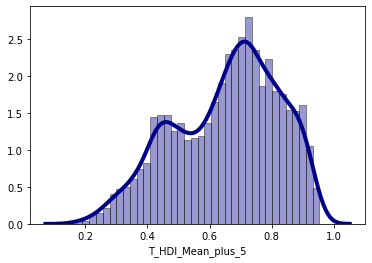

In [10]:
sns.distplot(df['T_HDI_Mean_plus_5'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

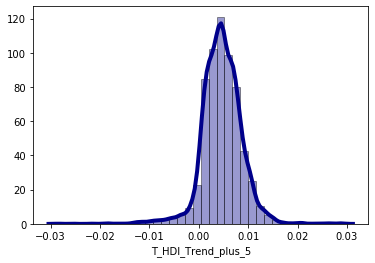

In [11]:
sns.distplot(df['T_HDI_Trend_plus_5'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})